In [2]:
# Librerias generales
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('train.csv')

### Limpieza y preprocesamiento de datos

In [4]:
# Descargar las stopwords si aún no las tienes
nltk.download('stopwords')

# Convertir a minúsculas
data['text'] = data['text'].str.lower()

# Quitar caracteres especiales, URL y números
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Quitar stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
###frecuencia de las palabras
# Dividir los datos en tweets de desastres y no desastres
disaster_tweets = data[data['target'] == 1]['text']
non_disaster_tweets = data[data['target'] == 0]['text']

# Tokenización y conteo de palabras
disaster_word_counts = Counter(' '.join(disaster_tweets).split())
non_disaster_word_counts = Counter(' '.join(non_disaster_tweets).split())

### Analisis exploratorio

In [6]:
# Palabras más comunes en tweets de desastres
disaster_common_words = disaster_word_counts.most_common(20)
print("Palabras comunes en tweets de desastres:", disaster_common_words)

Palabras comunes en tweets de desastres: [('fire', 180), ('news', 140), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93), ('like', 92), ('pm', 89), ('hiroshima', 89), ('storm', 85), ('us', 84), ('crash', 84), ('fires', 84), ('families', 81), ('train', 79), ('emergency', 76)]


In [7]:
# Palabras más comunes en tweets no desastres
non_disaster_common_words = non_disaster_word_counts.most_common(20)
print("Palabras comunes en tweets no desastres:", non_disaster_common_words)

Palabras comunes en tweets no desastres: [('like', 253), ('im', 248), ('amp', 193), ('new', 170), ('get', 163), ('dont', 154), ('one', 128), ('body', 113), ('via', 99), ('would', 97), ('video', 96), ('people', 91), ('love', 90), ('cant', 86), ('us', 86), ('time', 85), ('know', 85), ('back', 84), ('got', 83), ('see', 82)]


Parece que explorar bigramas o trigramas podría ser beneficioso para capturar mejor el contexto y las relaciones entre las palabras en ambos tipos de tweets. Por ejemplo, en el contexto de desastres, las combinaciones de palabras como 'california fire', 'suicide bomber', 'train crash', y similares podrían ser indicativas de la categoría de desastres.

In [8]:
# Crear vectorizador para unigramas y bigramas
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000)  # Puedes ajustar el número máximo de características

# Obtener la matriz de términos de documento
X = vectorizer.fit_transform(data['text'])

# Obtener las palabras más comunes en unigramas y bigramas para cada clase
disaster_common_words = vectorizer.get_feature_names_out()
non_disaster_common_words = vectorizer.get_feature_names_out()

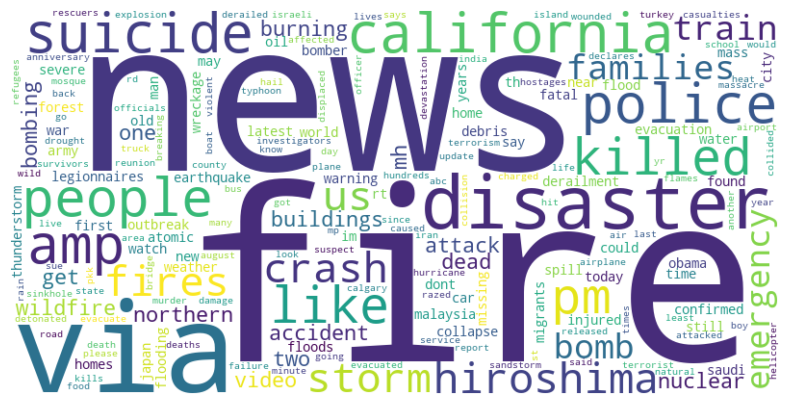

In [9]:
# Nube de palabras de desastres
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disaster_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

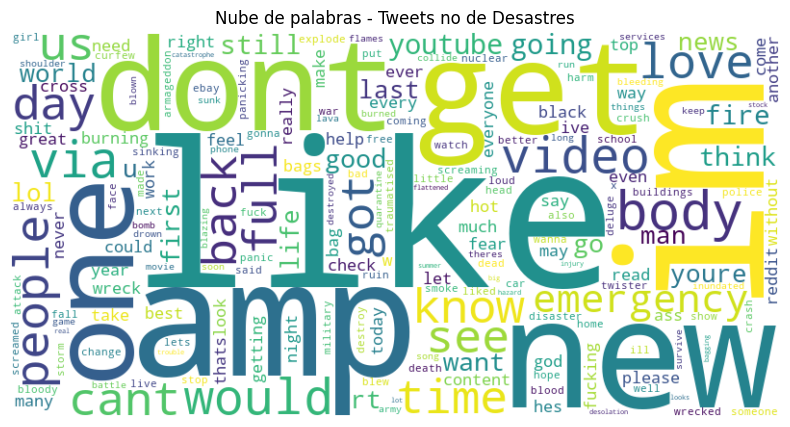

In [10]:
# Nube de palabras para tweets no desastres
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_disaster_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de palabras - Tweets no de Desastres')
plt.axis('off')
plt.show()

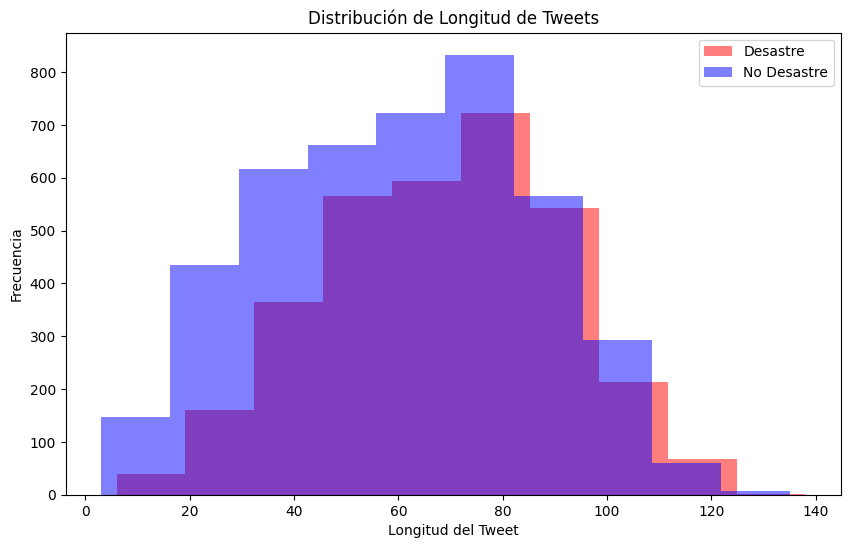

In [11]:
data['tweet_length'] = data['text'].apply(len)

plt.figure(figsize=(10, 6))
data[data['target'] == 1]['tweet_length'].plot(kind='hist', color='red', alpha=0.5, label='Desastre')
data[data['target'] == 0]['tweet_length'].plot(kind='hist', color='blue', alpha=0.5, label='No Desastre')
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de Longitud de Tweets')
plt.show()

In [12]:
common_words = set(disaster_word_counts.keys()) & set(non_disaster_word_counts.keys())
print("Palabras comunes en ambas categorías:", common_words)

Palabras comunes en ambas categorías: {'much', 'low', 'gordon', 'drawn', 'reminds', 'dm', 'board', 'different', 'returns', 'code', 'bus', 'kill', 'panel', 'fun', 'tomorrows', 'squad', 'ems', 'drivers', 'worstsummerjob', 'quarantine', 'internally', 'physical', 'collins', 'beyonce', 'hurricane', 'brick', 'repatriated', 'oooh', 'likely', 'siren', 'arsonist', 'itsjustinstuart', 'investigation', 'wanted', 'building', 'messages', 'scary', 'lose', 'gilbert', 'week', 'idiot', 'early', 'cannon', 'pol', 'drag', 'veterans', 'approves', 'paramedic', 'meet', 'clearedincident', 'vods', 'karma', 'towel', 'arrested', 'toward', 'vinyl', 'pump', 'hr', 'honestly', 'malaysia', 'schedule', 'meek', 'horizon', 'bringing', 'possibility', 'survivors', 'forgot', 'widespread', 'biggest', 'cutting', 'cnews', 'plaguing', 'idps', 'syndrome', 'hundreds', 'ptsd', 'clear', 'shows', 'sake', 'mission', 'videos', 'boxer', 'ends', 'undercover', 'armageddon', 'party', 'islamic', 'finding', 'sets', 'zayn', 'hey', 'looked', 

### Modelo de prediccion

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# Crear un modelo con TF-IDF y Naive Bayes
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# Entrenar el modelo
text_clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [14]:
def classify_tweet(tweet):
    prediction = text_clf.predict([tweet])
    if prediction[0] == 1:
        return "Desastre"
    else:
        return "No desastre"

In [15]:
# Ejemplo de uso 1
tweet_to_classify = "Incendio en el centro de la ciudad"
classification = classify_tweet(tweet_to_classify)
print("Clasificación:", classification)

Clasificación: Desastre


In [16]:
# Ejemplo de uso 2
tweet_to_classify = "Arcoiris y colores"
classification = classify_tweet(tweet_to_classify)
print("Clasificación:", classification)

Clasificación: No desastre
